In [1]:
import os
#os.chdir("./drive/MyDrive/Imperial/SOMAS/Experiments")
#os.chdir("./Experiments")
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#os.getcwd()

# Read from CSV

In [2]:
#using death.json file
def lives_vs_daysSurvived(fileName, team):
  if not isinstance(team,str):
    print("Error: Team variable should be a string!")

  dataFrame = pd.read_json(fileName, lines = True)
  teamData = dataFrame[dataFrame["agent_type"].str.contains(team)] #extract data for a certain team
  ages = teamData["ageUponDeath"].values #convert into numpy
  #ages = teamData["Age"].values #convert into numpy
  deaths = np.arange(len(ages)) + 1
  return deaths, ages 

#using .csv file
def cumulativeRewards(fileName):
  data = pd.read_csv(fileName).to_numpy()
  day = np.arange(data.size) + 1
  return day, data

#using death.json file
def days_vs_deathPerDay(fileName, simulation_days):
  dataFrame = pd.read_json(fileName, lines = True)
  day = np.arange(simulation_days) + 1
  deathPerDay = np.zeros(simulation_days)

  value_count = dataFrame["ageUponDeath"].value_counts()
  for n in range(simulation_days):
    if n+1 in value_count:
      deathPerDay[n] = value_count[n+1]
  
  return day, deathPerDay

In [ ]:
#plot lives vs days survived
fileName = "analyses/exp_cumulative_rewardslogs2022-01-07-22-06-27.json"
team = "Team6"
lives, days_survived = lives_vs_daysSurvived(fileName, team)
print(len(lives))

plt.bar(lives, days_survived, tick_label = lives)
#plt.plot(lives, days_survived, color = 'red')
#plt.scatter(lives, days_survived, color = 'red')
plt.xlabel("Deaths")
plt.ylabel("Days lived")
plt.title("Deaths vs Days lived")

In [ ]:
#Days vs death per day
day, deathPerDay = days_vs_deathPerDay(fileName, 10000)
#x = day[range(0,200,10)]
#y = deathPerDay[range(0,200,10)]

plt.bar(day,deathPerDay)
plt.xlabel("Days")
plt.ylabel("Death Per Day")
plt.title("Days vs Death per day")

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

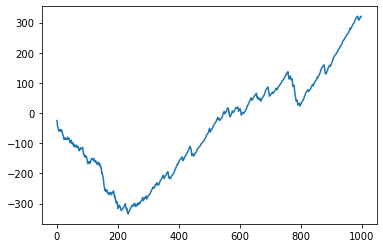

In [4]:
#cumulative rewards
fileName = "CSV_log/2022-01-09-16-52-20/cumulative_rewards_40e9975f-e19f-4656-971f-c041b5be016b.csv"
day, data = cumulativeRewards(fileName)
print(day)
print(data)
plt.plot(day,data)

# Read from json

In [7]:
t2 = pd.read_json("analyses/2022-01-07-11-51-31/main.json", lines = True)

print(t2.columns)

Index(['level', 'msg', 'reporter', 'time', 'type',
       'Number of new agents created: ', 'agent_id', 'new_floor', 'old_floor',
       'Current Simulation Tick', 'floor', 'food_left', 'agent_type', 'aggr',
       'greed', 'hp', 'kind', 'mood', 'morality', 'health', 'message',
       'receiver floor', 'request amount', 'sender floor', 'msgType',
       'senderFloor', 'targetFloor', 'bType', 'foodTaken', 'amount',
       'messageType', 'DaysToWait', 'FoodToEat', 'foodEaten', 'Mood',
       'Morality', 'response', 'statement', 'memory', 'food', 'global_trust',
       'daysHungry', 'sender_uuid', 'sentmessage_uuid', 'state',
       'selected and performed action', 'agentType', 'daysLived',
       'sentMsg_Type', 'Food_on_our_level', 'Request_amt',
       'Agent Type and number that died', 'agentAge', 'agentID'],
      dtype='object')


In [ ]:
import json
line_list = []
with open('analyses/2022-01-07-11-07-15/main.json') as f:
    for line in f:
        a_dict = json.loads(line)
        df = pd.DataFrame(a_dict).T
        line_list.append(df)

df = pd.concat(line_list)

In [11]:
#t_all = pd.read_json("analyses/2022-01-05-21-16-45/main.json", lines = True)
#t_all = t2.loc[t2["agentType"] == "Team2"]
#t_all.head()
t_all = t2.loc[t2['msg'] == "Killing agent"]
#t_all = t_all.loc[t_all['agent_type'] == "Team2"]
t_all

,level,msg,reporter,time,type,Number of new agents created:,agent_id,new_floor,old_floor,Current Simulation Tick,...,state,selected and performed action,agentType,daysLived,sentMsg_Type,Food_on_our_level,Request_amt,Agent Type and number that died,agentAge,agentID
31637,info,Killing agent,agent,2022-01-07T11:51:32Z,NaN,NaN,8e9d9719-81a3-4c8a-a1aa-9658eb3a5df8,NaN,NaN,NaN,...,NaN,NaN,7,9.0,NaN,NaN,NaN,NaN,NaN,NaN
31639,info,Killing agent,agent,2022-01-07T11:51:32Z,NaN,NaN,396d42cd-31b0-4bb6-ac92-e0e8c50e3f9c,NaN,NaN,NaN,...,NaN,NaN,8,9.0,NaN,NaN,NaN,NaN,NaN,NaN
63224,info,Killing agent,agent,2022-01-07T11:51:32Z,NaN,NaN,396d42cd-31b0-4bb6-ac92-e0e8c50e3f9c,NaN,NaN,NaN,...,NaN,NaN,8,9.0,NaN,NaN,NaN,NaN,NaN,NaN
82106,info,Killing agent,agent,2022-01-07T11:51:33Z,NaN,NaN,2d689674-63a7-4255-82fe-5cf17ca32eb2,NaN,NaN,NaN,...,NaN,NaN,8,25.0,NaN,NaN,NaN,NaN,NaN,NaN
100970,info,Killing agent,agent,2022-01-07T11:51:33Z,NaN,NaN,396d42cd-31b0-4bb6-ac92-e0e8c50e3f9c,NaN,NaN,NaN,...,NaN,NaN,8,11.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063100,info,Killing agent,agent,2022-01-07T11:52:43Z,NaN,NaN,3a768563-a46f-4e05-9ff1-0dee36d182fc,NaN,NaN,NaN,...,NaN,NaN,5,161.0,NaN,NaN,NaN,NaN,NaN,NaN
3066201,info,Killing agent,agent,2022-01-07T11:52:43Z,NaN,NaN,8e9d9719-81a3-4c8a-a1aa-9658eb3a5df8,NaN,NaN,NaN,...,NaN,NaN,7,12.0,NaN,NaN,NaN,NaN,NaN,NaN
3066208,info,Killing agent,agent,2022-01-07T11:52:43Z,NaN,NaN,870a86c5-0dc1-478d-bfd7-e2fe96f86ff0,NaN,NaN,NaN,...,NaN,NaN,5,35.0,NaN,NaN,NaN,NaN,NaN,NaN
3078617,info,Killing agent,agent,2022-01-07T11:52:44Z,NaN,NaN,2782de44-3c9a-4e87-80a6-c44998dc7253,NaN,NaN,NaN,...,NaN,NaN,7,49.0,NaN,NaN,NaN,NaN,NaN,NaN


1st graph

IndexError: index 0 is out of bounds for axis 0 with size 0

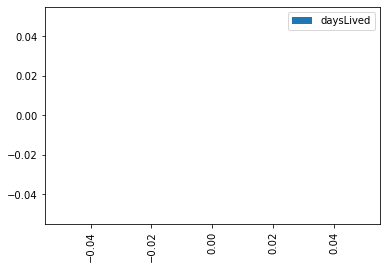

In [9]:
plotdata = pd.DataFrame(t_all, columns = ['daysLived'])
#plotdata = t_all[['agent_type','daysLived']]
#plotdata
plotdata.reset_index(inplace=True)
plotdata = pd.DataFrame(plotdata, columns = ['daysLived'])
plotdata.plot(kind='bar')

2nd Graph All agent - death at daysLived = x

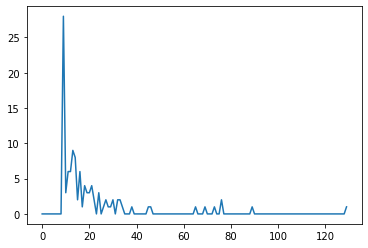

In [ ]:
P2 = t2.loc[t2['msg'] == "Killing agent"]
plotdata = pd.DataFrame(P2, columns = ['agent_type','daysLived'])
#indexedData = plotdata.set_index('daysLived')
#indexedData.sort_index(ascending=True)
#indexedData.plot(kind='bar')
SumArray = [0]* (int(max(plotdata['daysLived']))+1)
for index, row in plotdata.iterrows():
    #print(row['daysLived'])
    SumArray[int(row['daysLived'])] = SumArray[int(row['daysLived'])] + 1
plt.plot(SumArray)

3rd Graph 

IndexError: index 0 is out of bounds for axis 0 with size 0

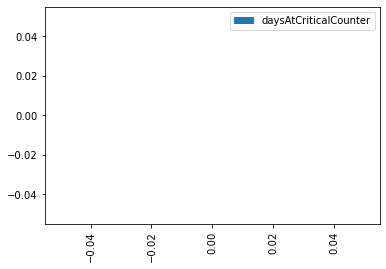

In [12]:
t_all = t2.loc[t2['msg'] == "Agent team2 at critical state"]
#t_all = t_all.loc[t_all['agent_type'] == "Team2"]
plotdata = pd.DataFrame(t_all, columns = ['agent_id','daysAtCriticalCounter'])
#plotdata = t_all[['agent_type','daysLived']]
#plotdata
#plotdata.set_index('agent_id')
#plotdata.groupby('agent_id', sort = False).max()
#plotdata.iloc[plotdata.groupby('agent_id').apply(lambda x: x['daysAtCriticalCounter'].idxmax())]
#plotdata.groupby(['agent_id'], sort=False)['daysAtCriticalCounter'].max()
idx = plotdata.groupby(['agent_id'])['daysAtCriticalCounter'].transform(max) == plotdata['daysAtCriticalCounter']
#df[idx]
"""
plotdata.reset_index(inplace=True)
plotdata = pd.DataFrame(plotdata, columns = ['daysLived'])
plotdata.plot(kind='bar')
"""
PD = plotdata[idx]
PD.plot(kind='bar')

In [30]:
# Use death instead
td = pd.read_json("analyses/exp_cumulative_rewardslogs2022-01-07-22-06-27.json", lines = True)

print(td.columns)

Index(['ageUponDeath', 'agent_type', 'cumulativeDeaths', 'day', 'level', 'msg',
       'tick', 'time'],
      dtype='object')


4th graph - Lived day vs average day live for an agent

In [31]:
t_all = td.loc[td['agent_type'] == "Team2"]
#t_all = t_all.loc[t_all['agent_type'] == "Team2"]
t_all

,ageUponDeath,agent_type,cumulativeDeaths,day,level,msg,tick,time


<AxesSubplot:>

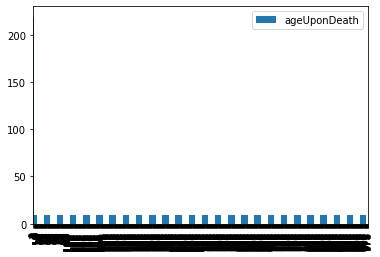

In [20]:
plotdata = pd.DataFrame(t_all, columns = ['ageUponDeath'])
plotdata.reset_index(inplace=True)
plotdata = pd.DataFrame(plotdata, columns = ['ageUponDeath'])
plotdata.plot(kind='bar')

<AxesSubplot:>

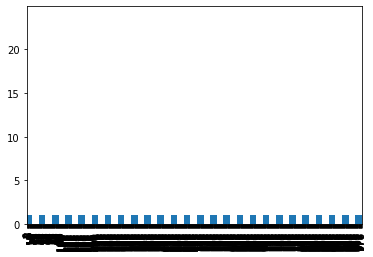

In [21]:
plotdata = pd.DataFrame(t_all, columns = ['ageUponDeath'])
plotdata.reset_index(inplace=True)
plotdata = pd.DataFrame(plotdata, columns = ['ageUponDeath'])
mean_day_lived = plotdata['ageUponDeath'].mean()
plotdata = plotdata['ageUponDeath']/mean_day_lived
plotdata.plot(x='index',kind='bar')

<AxesSubplot:xlabel='agent_type'>

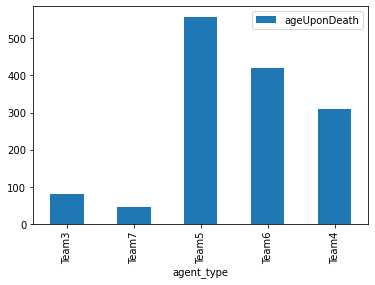

In [32]:
# max survive days over each agent
t_all = td
plotdata = pd.DataFrame(t_all, columns = ['agent_type','ageUponDeath'])
idx = plotdata.groupby(['agent_type'])['ageUponDeath'].transform(max) == plotdata['ageUponDeath']
PD = plotdata[idx]
PD.plot(x='agent_type',kind='bar')

<AxesSubplot:xlabel='agent_type'>

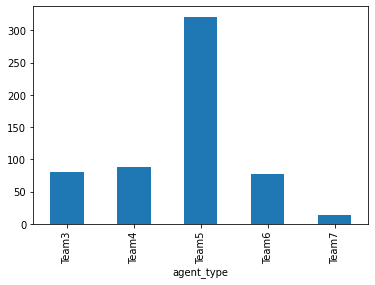

In [33]:
# mean day survive per agent
t_all = td
plotdata = pd.DataFrame(t_all, columns = ['agent_type','ageUponDeath'])
A_sorted = plotdata.sort_values(["agent_type"], ascending=True)
A_sorted = A_sorted.groupby(['agent_type'])['ageUponDeath'].mean()
#PD = plotdata[idx]
#plotdata
A_sorted.plot(x='agent_type',kind='bar')